### 任务：
1. 采用 K-Means 算法实现2D数据自动聚类，预测 V1=80, V2=60 数据类别；
2. 计算预测准确率，完成结果矫正

In [1]:
# 控制以允许JupyterNotebook多个输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_path = './datasets/06/data.csv'

In [4]:
data = pd.read_csv(data_path)
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [5]:
X = data.drop(['labels'], axis=1)
y = data.loc[:, 'labels']
pd.value_counts(y)

2    1156
1     954
0     890
Name: labels, dtype: int64

In [6]:
data = np.array(data)
X, y = data[:, :2], data[:, 2]
X.shape
y.shape

(3000, 2)

(3000,)

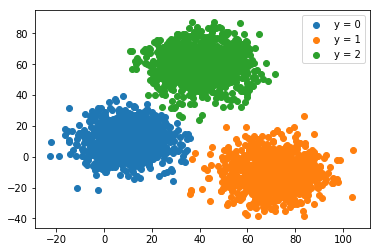

In [7]:
y_0 = plt.scatter(X[y==0, 0], X[y==0, 1])
y_1 = plt.scatter(X[y==1, 0], X[y==1, 1])
y_2 = plt.scatter(X[y==2, 0], X[y==2, 1])
plt.legend((y_0, y_1, y_2), ('y = 0', 'y = 1', 'y = 2'))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(2250, 2)

(2250,)

(750, 2)

(750,)

In [10]:
km_cluster = KMeans(n_clusters=3, random_state=2021)

In [11]:
km_cluster.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2021, tol=0.0001, verbose=0)

In [12]:
km_cluster.cluster_centers_

array([[40.46039857, 59.69134491],
       [69.89926274, -9.70972598],
       [ 9.31438391, 10.82346903]])

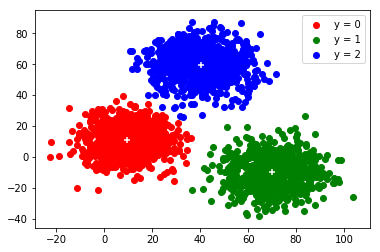

In [13]:
y_0 = plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='r')
y_1 = plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='g')
y_2 = plt.scatter(X_train[y_train==2, 0], X_train[y_train==2, 1], color='b')
plt.scatter(km_cluster.cluster_centers_[:, 0], km_cluster.cluster_centers_[:, 1], color='#FFFFFF', marker='+')
plt.legend((y_0, y_1, y_2), ('y = 0', 'y = 1', 'y = 2'))
plt.show()

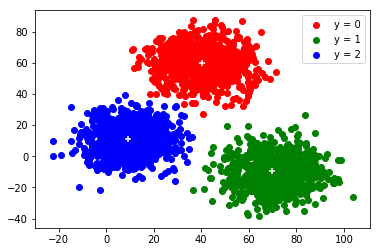

In [14]:
# 标签矫正
y_train_predict = km_cluster.predict(X_train)

y_0 = plt.scatter(X_train[y_train_predict==0, 0], X_train[y_train_predict==0, 1], color='r')
y_1 = plt.scatter(X_train[y_train_predict==1, 0], X_train[y_train_predict==1, 1], color='g')
y_2 = plt.scatter(X_train[y_train_predict==2, 0], X_train[y_train_predict==2, 1], color='b')
plt.scatter(km_cluster.cluster_centers_[:, 0], km_cluster.cluster_centers_[:, 1], color='#FFFFFF', marker='+')
plt.legend((y_0, y_1, y_2), ('y = 0', 'y = 1', 'y = 2'))
plt.show()

In [15]:
exchange_dict = {
    0: 2,
    1: 1,
    2: 0
}

In [16]:
y_test_predict = km_cluster.predict(X_test)
y_predict_correct = [exchange_dict[e] for e in y_test_predict]

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_true=y_test, y_pred=y_predict_correct)

0.9946666666666667

In [19]:
X_target = np.array([80, 60]).reshape(1, -1)
X_target.shape

(1, 2)

In [20]:
y_target = km_cluster.predict(X_target)
y_target_correct = exchange_dict[y_target[0]]
y_target_correct

2

In [21]:
# 绘制决策边界
def plot_decision_boundary(model, axis, epsilon=500):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], epsilon).reshape(-1, 1),
        np.linspace(axis[2], axis[3], epsilon).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

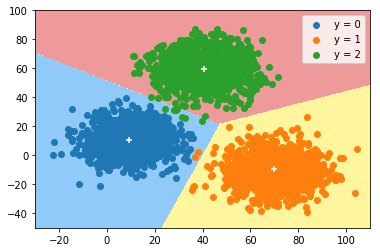

In [23]:
plot_decision_boundary(km_cluster, axis=[-30, 110, -50, 100])
y_0 = plt.scatter(X[y==0, 0], X[y==0, 1])
y_1 = plt.scatter(X[y==1, 0], X[y==1, 1])
y_2 = plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(km_cluster.cluster_centers_[:, 0], km_cluster.cluster_centers_[:, 1], color='#FFFFFF', marker='+')
plt.legend((y_0, y_1, y_2), ('y = 0', 'y = 1', 'y = 2'))
plt.show()